In [316]:
#*************************************************
#Name: Jesus Lua                                 *
#                                                *
#Class 490 Machine Learning                      *
#                                                *
#Function: Purpose of this program is to practice*
#on a dataset of caravan insurance, and applaying*
#model methods to train,test,and predict in      *
#buying a caravan insurance, as well as          *
#implementing decision trees and polynomial feat-*
#ures to bring better accuracy results.          *
#*************************************************

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

Targets = pd.read_csv("Targets.txt", delimiter='\t')
Testing = pd.read_csv("Testing.txt", delimiter='\t')
Training = pd.read_csv("Training.txt" , delimiter='\t')


#Can you predict who would be interested in buying a
#caravan insurance policy and give an explanation why?

print(Targets.shape)
Targets.head()

(3999, 1)


,0
0,1
1,0
2,0
3,0
4,0


In [117]:
print(Training.shape)
Training.head()

(5821, 86)


,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.40,0.41,0.42,0.43,0.44,0.45
0,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
2,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
3,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
4,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
print(Testing.shape)
Testing.head()

(3999, 85)


,33,1,4,2,8,0,6,0.1,3,5,...,0.37,0.38,0.39,0.40,1.12,0.41,0.42,0.43,0.44,0.45
0,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
1,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
2,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
3,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0
4,30,1,2,4,7,1,4,2,3,5,...,0,0,0,0,2,0,0,0,0,0


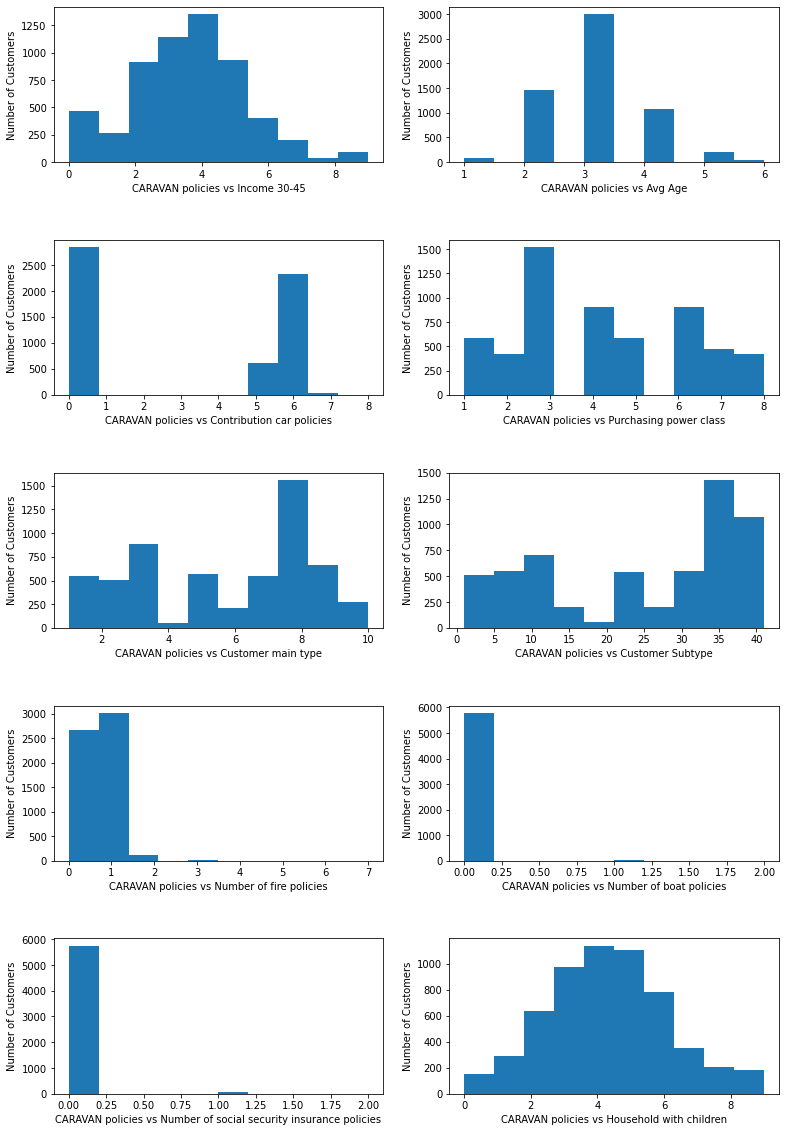

In [151]:
TargetVar = []

TargetVar.append(Training.iloc[:,85])

#Top10 Features
#--------------------
# 1) MINK4575
MINK3045 =[]
MINK3045.append(Training.iloc[:,37])
# 2) 4 MGEMLEEF Avg age
MGEMLEEF = []
MGEMLEEF.append(Training.iloc[:,3])
# 3) PPERSAUT Contribution car policies
PPERSAUT = []
PPERSAUT.append(Training.iloc[:,46])
# 4) MKOOPKLA Purchasing power class
MKOOPKLA = []
MKOOPKLA.append(Training.iloc[:,42])
# 5) MOSHOOFD Customer main type
MOSHOOFD = []
MOSHOOFD.append(Training.iloc[:,4])
# 6) MOSTYPE Customer Subtype see L0
MOSTYPE = []
MOSTYPE.append(Training.iloc[:,0])
# 7) ABRAND Number of fire policies
ABRAND = []
ABRAND.append(Training.iloc[:,79])
# 8) APLEZIER Number of boat policies
APLEZIER = []
APLEZIER.append(Training.iloc[:,81])
# 9) ABYSTAND Number of social security insurance policies
ABYSTAND = []
ABYSTAND.append(Training.iloc[:,84])
# 10) MFWEKIND Household with children
MFWEKIND = []
MFWEKIND.append(Training.iloc[:,14])


f = plt.figure(figsize=(13,20))
f.subplots_adjust(hspace=.5)
ax = f.add_subplot(5,2,1)
ax.hist(MINK3045)
plt.xlabel('CARAVAN policies vs Income 30-45')
plt.ylabel('Number of Customers')
ax2 = f.add_subplot(5,2,2)
ax2.hist(MGEMLEEF)
plt.xlabel('CARAVAN policies vs Avg Age')
plt.ylabel('Number of Customers')
ax3 = f.add_subplot(5,2,3)
ax3.hist(PPERSAUT)
plt.xlabel('CARAVAN policies vs Contribution car policies')
plt.ylabel('Number of Customers')
ax4 = f.add_subplot(5,2,4)
ax4.hist(MKOOPKLA)
plt.xlabel('CARAVAN policies vs Purchasing power class')
plt.ylabel('Number of Customers')
ax5 = f.add_subplot(5,2,5)
ax5.hist(MOSHOOFD)
plt.xlabel('CARAVAN policies vs Customer main type')
plt.ylabel('Number of Customers')
ax6 = f.add_subplot(5,2,6)
ax6.hist(MOSTYPE)
plt.xlabel('CARAVAN policies vs Customer Subtype')
plt.ylabel('Number of Customers')
ax7 = f.add_subplot(5,2,7)
ax7.hist(ABRAND)
plt.xlabel('CARAVAN policies vs Number of fire policies')
plt.ylabel('Number of Customers')
ax8 = f.add_subplot(5,2,8)
ax8.hist(APLEZIER)
plt.xlabel('CARAVAN policies vs Number of boat policies')
plt.ylabel('Number of Customers')
ax9 = f.add_subplot(5,2,9)
ax9.hist(ABYSTAND)
plt.xlabel('CARAVAN policies vs Number of social security insurance policies')
plt.ylabel('Number of Customers')
ax10 = f.add_subplot(5,2,10)
ax10.hist(MFWEKIND)
plt.xlabel('CARAVAN policies vs Household with children')
plt.ylabel('Number of Customers')
plt.show()

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(
Training[['4','2','6.2','3.2','8','33','1.13','0.41','0.44','6']],Training['0.45'], 
    random_state=42)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

print(np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=10)))

print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))


C: 10
Coefficient of each feature: [[ 0.01300504  0.16859607  0.24488493  0.19715161 -0.42095501  0.08979966
   0.52469319  2.06521054  0.72071899  0.05263677]]
Training accuracy: 0.940893470790378
Test accuracy: 0.9326923076923077

C: 1
Coefficient of each feature: [[ 0.00702865  0.12335188  0.24161842  0.17993833 -0.35719669  0.07359144
   0.50300827  1.89797665  0.61162665  0.0426352 ]]
Training accuracy: 0.9415807560137457
Test accuracy: 0.9333791208791209

C: 0.1
Coefficient of each feature: [[-0.01790705 -0.07444745  0.21174572  0.04475952 -0.05349095 -0.01108825
   0.30484841  0.          0.          0.        ]]
Training accuracy: 0.9424971363115693
Test accuracy: 0.9333791208791209

C: 0.001
Coefficient of each feature: [[ 0.          0.          0.         -0.1125813   0.         -0.08608882
   0.          0.          0.          0.        ]]
Training accuracy: 0.9424971363115693
Test accuracy: 0.9333791208791209



C:\Users\jesus\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jesus\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.9415814666302772
Training set score: 0.942


C:\Users\jesus\.julia\conda\3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


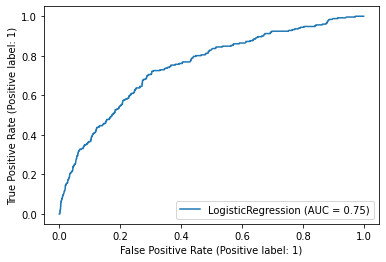

In [389]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,X_train,y_train)

In [390]:
print(clf.coef_, clf.intercept_)

[[ 0.00702316  0.12331565  0.24161622  0.17988828 -0.35663534  0.07345865
   0.50308563  1.89805894  0.61154923  0.0426298 ]] [-5.23774102]


 Are  they  in  synch  with  your selected features from question 1?
 Yes some features are in synch with those from the top 10 chosen features, when C value
 is 0.1 is when we get the most synch features.

In [375]:
param_grid2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = LogisticRegression(penalty='l1',solver='liblinear')
clf.fit(X_train, y_train)

grid_search = GridSearchCV(clf,param_grid=param_grid2, cv=10).fit(X_train,y_train).best_params_
print(grid_search)

{'C': 0.001}


From the example below, while using polynomial features and LogisticRegression with L1, the accuracy increased by 0.001.

In [386]:
#Generate polynomial features and use LogReg again with L1. See if accuracy increase.
from sklearn.preprocessing import PolynomialFeatures

trans = PolynomialFeatures(degree=2,interaction_only=False, include_bias=False)
X_poly = trans.fit_transform(X_train)

lr = LogisticRegression(penalty='l1',solver='liblinear',C=1)
lr.fit(X_poly,y_train)
print("Training set score after PolynomialFeatures: {:.3f}".format(lr.score(X_poly,y_train)))

#pipe = Pipeline([('polynomial_features',trans), ('logistic_regression',lr)])
#pipe.fit(X_train, y_train)
#print(pipe.score(X_train, y_train))

#print("Test set score: {:.2f}".format(grid_search.score(X_train, y_train)))
#print(grid_search.C)
#print(grid_search.best_estimator_)

Training set score after PolynomialFeatures: 0.943


In [388]:
#Polynomial Features
print(X_poly)

[[ 1.  3.  6. ...  0.  0. 36.]
 [ 5.  4.  6. ...  0.  0.  0.]
 [ 4.  3.  0. ...  0.  0.  9.]
 ...
 [ 4.  3.  0. ...  0.  0. 36.]
 [ 1.  4.  0. ...  0.  0. 25.]
 [ 2.  3.  6. ...  0.  0.  9.]]


When training the Decicion Tree, my results gave me a better accuracy by an increase of 0.1, feature importance showed that some features were in synch with those features tested while using Logistic Regression and the top 10 features.

In [385]:
tree = DecisionTreeClassifier(max_depth=4,random_state=10)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

print(tree.feature_importances_)

Accuracy on training set: 0.944
[0.02542074 0.03475391 0.339689   0.19560384 0.06950782 0.06264016
 0.10978844 0.1533516  0.         0.00924449]


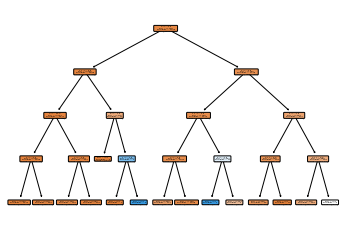

In [395]:
from sklearn.tree import plot_tree
tree_dot = plot_tree(tree,filled=True,rounded=True, feature_names= Training.columns)